# GENRE CLASSIFICATION BASED ON AUDIO FEATURES
## Lucy Barsanti, Mathew Karwan, Sasha Loayza

In [1]:
#Features spotify api:https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features
#Dataset "Spotify Song Attributes": https://www.kaggle.com/datasets/geomack/spotifyclassification

#NEW DATASET: https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify

possible ideas:
- use a kNN model to predict genre using danceability and acousticness as features
- use a linear regression (or some other model) model to predict the mode using instrumentalness, liveness, and something else as the features (use a correlation table to figure out)


In [2]:
import numpy as np
import pandas as pd
import seaborn

ModuleNotFoundError: No module named 'pandas'

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [ ]:
df=pd.read_csv("data.csv")
df.drop(columns=["Unnamed: 0","type","id","uri","track_href","analysis_url","title","song_name"],inplace=True)
df.dropna(subset=["genre"],inplace=True)
df_org=df.copy(deep=True)

## THE PAIRPLOT VISUALIZATION CAN HELP TO IDENTIFY NONLINEAR CORRELATIONS AND OTHER PATTERNS BETWEEN FEATURES AND THE TARGET

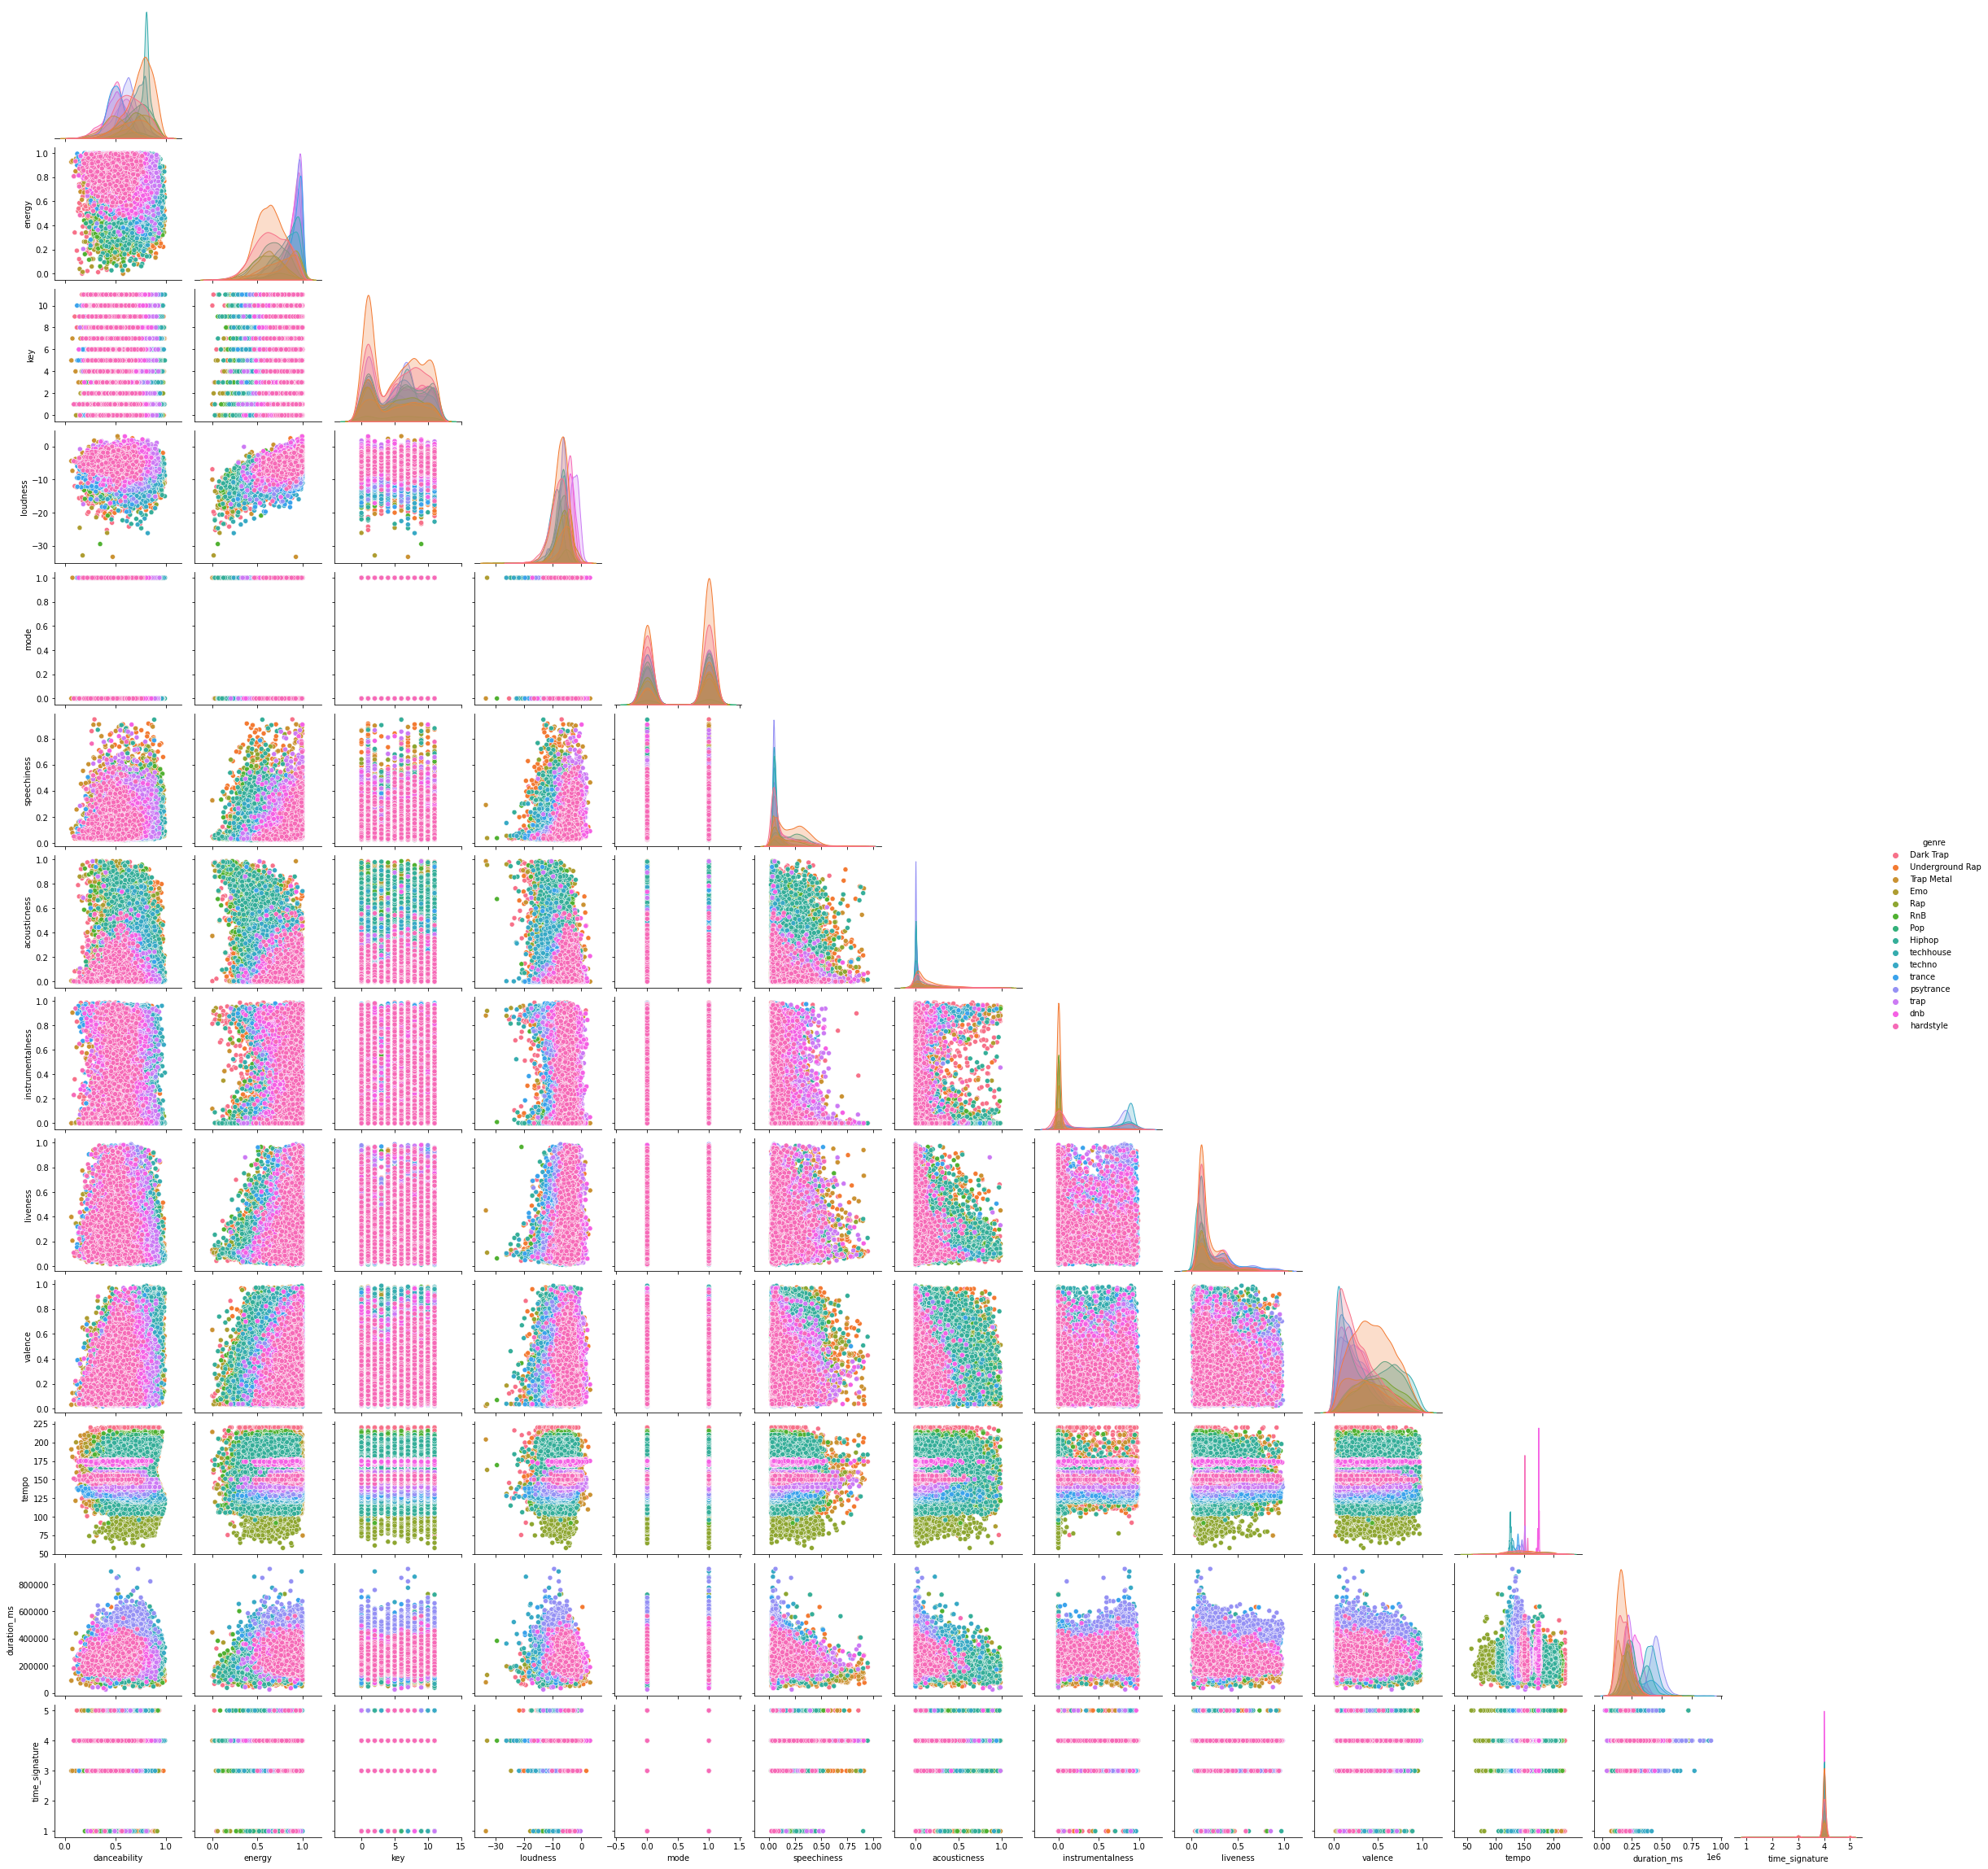

In [ ]:
from seaborn import pairplot
#Create Pair plot visualization to see nonlinear correlations 
pairplot(df_org,hue="genre",corner=True)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df[["genre"]]).toarray())
encoder_df.columns = encoder.get_feature_names_out(['genre'])
df = df.join(encoder_df)

## WE USE THE HEAD METHOD TO LOOK AT THE NEWLY FORMED ENCODED COLUMNS AND THE UPDATED DATAFRAME

In [ ]:
encoder_df.head()

,genre_Dark Trap,genre_Emo,genre_Hiphop,genre_Pop,genre_Rap,genre_RnB,genre_Trap Metal,genre_Underground Rap,genre_dnb,genre_hardstyle,genre_psytrance,genre_techhouse,genre_techno,genre_trance,genre_trap
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,genre_RnB,genre_Trap Metal,genre_Underground Rap,genre_dnb,genre_hardstyle,genre_psytrance,genre_techhouse,genre_techno,genre_trance,genre_trap
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## WE USE BOX PLOT VISUALIZATIONS TO UNDERSTAND HOW DURATION AND TEMPO ARE RELATED TO GENRE

In [ ]:
trap = df[df['genre_trap'] == 1]
techno = df[df['genre_techno'] == 1]
techhouse = df[df['genre_techhouse'] == 1]
trance = df[df['genre_trance'] == 1]
psytrance = df[df['genre_psytrance'] == 1]
dark_trap = df[df['genre_techno'] == 1]
hardstyle = df[df['genre_hardstyle'] == 1]
underground_rap = df[df['genre_Underground Rap'] == 1]
trap_metal = df[df['genre_Trap Metal'] == 1]
emo = df[df['genre_Emo'] == 1]
rap = df[df['genre_Rap'] == 1]
rnb = df[df['genre_RnB'] == 1]
pop = df[df['genre_Pop'] == 1]
hiphop = df[df['genre_Hiphop'] == 1]

genre_duration_plot = plt.boxplot([trap['duration_ms'], techno['duration_ms'], techhouse['duration_ms'], trance['duration_ms'], psytrance['duration_ms'], dark_trap['duration_ms'], hardstyle['duration_ms'], underground_rap['duration_ms'], trap_metal['duration_ms'], emo['duration_ms'], rap['duration_ms'], rnb['duration_ms'], pop['duration_ms'], hiphop['duration_ms']])

plt.xticks(range(1,15), 
           ['Trap', 'Techno', 'Techhouse', 'Trance', 'Psytrance', 'Dark Trap', 'Hardstyle', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB', 'Pop', 'Hiphop'],
           rotation=60)
plt.xlim([0,15])
plt.title('Duration by Genre Boxplots')
plt.xlabel('Genre')
plt.ylabel('Milliseconds')

plt.show()


genre_duration_plot = plt.boxplot([trap['tempo'], techno['tempo'], techhouse['tempo'], trance['tempo'], psytrance['tempo'], dark_trap['tempo'], hardstyle['tempo'], underground_rap['tempo'], trap_metal['tempo'], emo['tempo'], rap['tempo'], rnb['tempo'], pop['tempo'], hiphop['tempo']])
plt.xticks(range(1,15), 
           ['Trap', 'Techno', 'Techhouse', 'Trance', 'Psytrance', 'Dark Trap', 'Hardstyle', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB', 'Pop', 'Hiphop'],
           rotation=60)
plt.xlim([0,15])
plt.title('Tempo by Genre Boxplots')
plt.xlabel('Genre')
plt.ylabel('BPM')

plt.show()

## WE SEE CLEAR BANDS IN THE GENRE vs TEMPO BOXPLOTS, CONFIRMING A POSSIBLE DECISION BOUNDARY REVEALED BY THE PAIR PLOT!

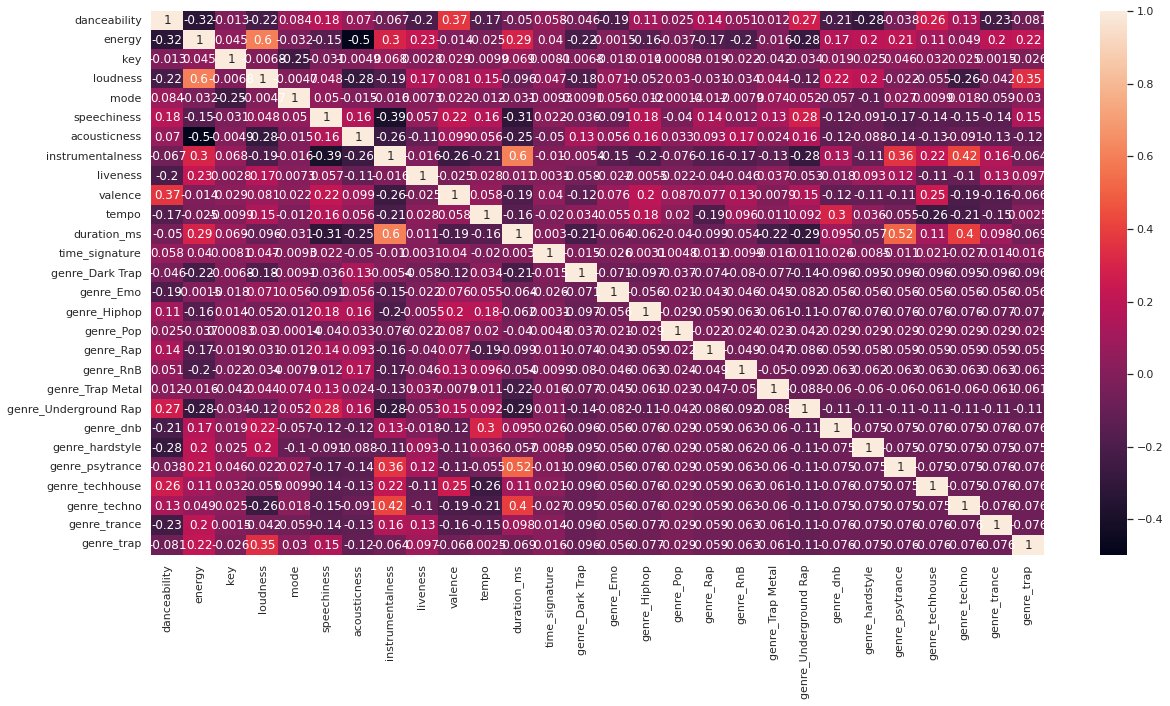

In [ ]:
corr = df.corr()
seaborn.set(rc = {'figure.figsize':(20,10)})
seaborn.heatmap(corr, annot=True)
plt.show()

In [ ]:
features = df[["danceability", "duration_ms", "instrumentalness"]];
target = df["genre"];
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

In [ ]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'genre', 'genre_Dark Trap',
       'genre_Emo', 'genre_Hiphop', 'genre_Pop', 'genre_Rap', 'genre_RnB',
       'genre_Trap Metal', 'genre_Underground Rap', 'genre_dnb',
       'genre_hardstyle', 'genre_psytrance', 'genre_techhouse', 'genre_techno',
       'genre_trance', 'genre_trap'],
      dtype='object')

# MODELS

### K NEAREST NEIGHBORS MODEL

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 7)
knn_model.fit(x_train, y_train)
knn_predict = knn_model.predict(x_test)
print("kNN Test Accuracy:", accuracy_score(y_test, knn_predict))

kNN Test Accuracy: 0.280936059567427


In [ ]:
from sklearn.preprocessing import normalize
# TRY USING ALL POSSIBLE FEATURES
features_2 = df.loc[:,:"time_signature"]
features_norm = preprocessing.normalize(features_2, norm='max')
target = df["genre"];


x_train, x_test, y_train, y_test = train_test_split(features_norm, target, test_size = 0.2, random_state = 42)
knn_model = KNeighborsClassifier(n_neighbors = 7)
knn_model.fit(x_train, y_train)
knn_predict = knn_model.predict(x_test)
print("kNN Test Accuracy:", accuracy_score(y_test, knn_predict))

kNN Test Accuracy: 0.38116061931213807


## DECISION TREE MODEL

In [ ]:
# TEST WHICH MAX_DEPTH IS MOST EFFECTIVE FOR DECISION TREE CLASSIFIER, from 1 to 30
from sklearn.tree import DecisionTreeClassifier
#Store accuracy scores for each max depth where accuracy[d] is 
# a of accuracy of the model at depth d for each random state
dt_accuracies=np.zeros((10,30))

for i in range(10):
  dt_seed_accuracies=np.zeros(30)
  x_train, x_test, y_train, y_test = train_test_split(features_2, target, test_size = 0.2, random_state = i)
  for j in range(1,31):
    # create and train the model with same seed
    dtree_model = DecisionTreeClassifier(max_depth = j,random_state=i)
    dtree_model.fit(x_train,y_train)
    dtree_test = dtree_model.predict(x_test)
    dt_seed_accuracies[j-1]=accuracy_score(y_test,dtree_test)
  dt_accuracies[i]=dt_seed_accuracies


In [ ]:
# Store Average accuracies for each depth (average of all seeds)
dt_accuracy=np.average(dt_accuracies,axis=0)

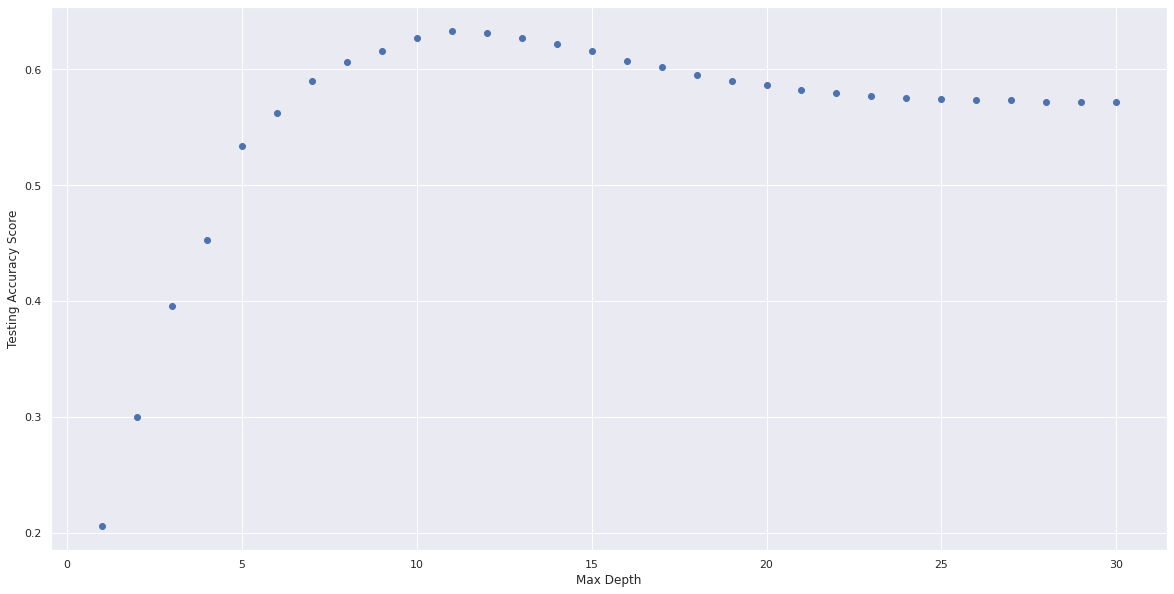

Best max depth:  11
Best Score:  0.6326320765866918


In [ ]:
# Plot the accuracy scores by depth
plt.scatter(range(1,31),dt_accuracy)
plt.xlabel("Max Depth")
plt.ylabel("Testing Accuracy Score")
plt.show()
best_max_depth=0
best_score=0
for depth,score in enumerate(dt_accuracy):
  if score>best_score: 
    best_score=score
    best_max_depth=depth+1
print("Best max depth: ", best_max_depth)
print("Best Score: ",best_score)

## THE BEST MAX DEPTH FOR THE DECISION TREE IS 11. The tree is shown below

Accuracy Score of DTree with depth 11:  0.6405862191230351


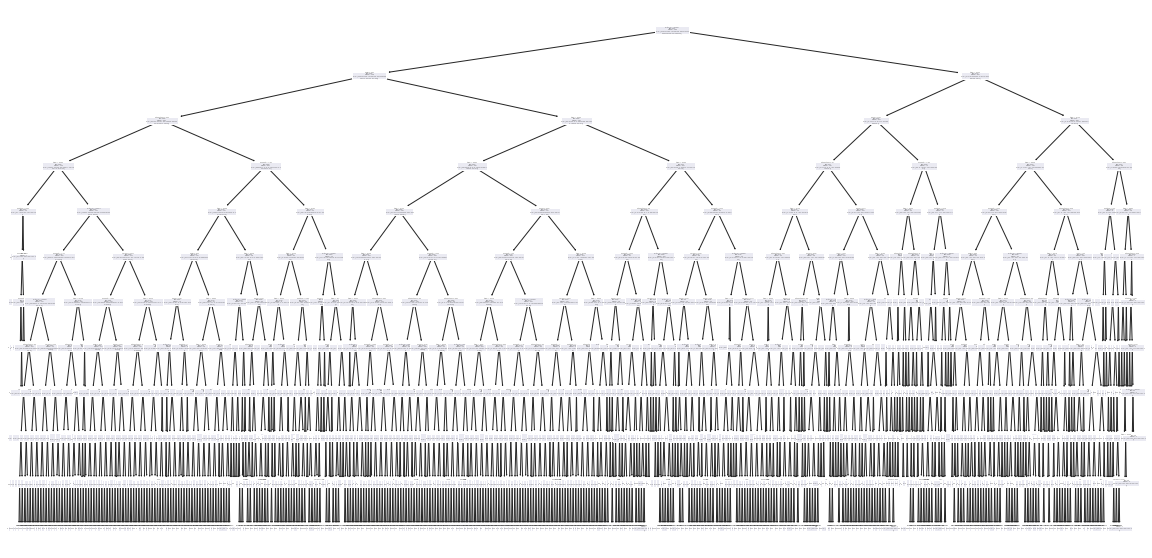

In [ ]:
from sklearn.tree import plot_tree
best_tree=DecisionTreeClassifier(max_depth=11)
best_tree.fit(x_train,y_train)
plot_tree(best_tree,feature_names=features_2.columns)
print("Accuracy Score of DTree with depth 11: ", accuracy_score(y_test, best_tree.predict(x_test)))


## RANDOM FOREST CLASSIFIER MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# TEST WHICH MAX_DEPTH IS MOST EFFECTIVE FOR RANDOM FOREST CLASSIFIER, from 1 to 12

#Store accuracy scores for each max depth where accuracy[d] is 
# a of accuracy of the model at depth d for each random state
rf_accuracies=np.zeros((10,12))

for i in range(10):
  rf_seed_accuracies=np.zeros(12)
  x_train, x_test, y_train, y_test = train_test_split(features_2, target, test_size = 0.2, random_state = i)
  for j in range(1,13):
    # create and train the model with same seed
    rforest_model = RandomForestClassifier(max_depth = j,random_state=i)
    rforest_model.fit(x_train,y_train)
    rforest_test = rforest_model.predict(x_test)
    rf_seed_accuracies[j-1]=accuracy_score(y_test,rforest_test)
  rf_accuracies[i]=rf_seed_accuracies


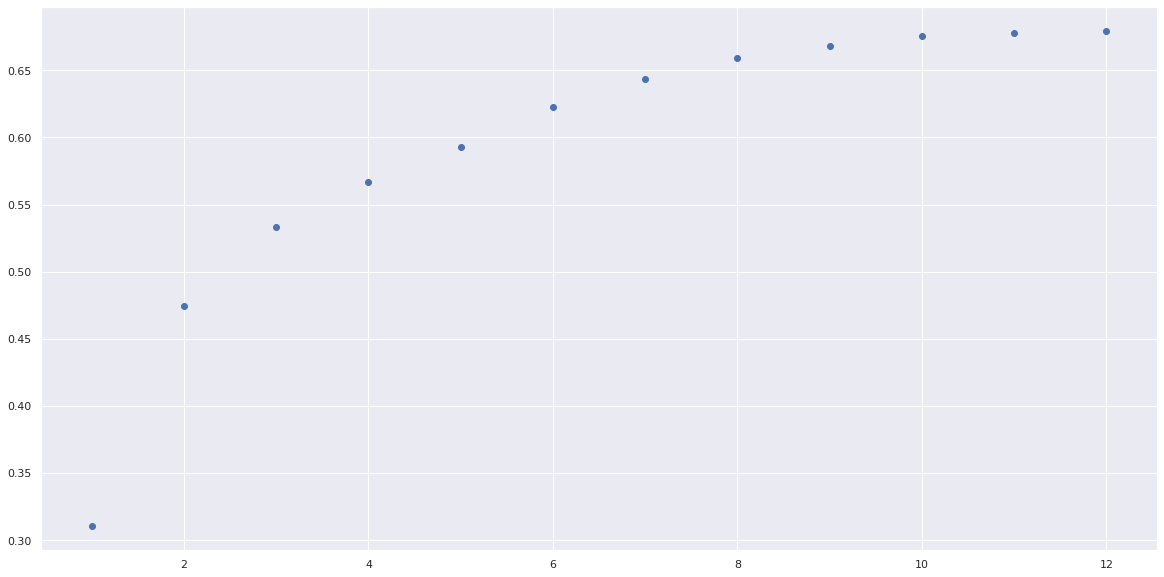

In [ ]:
# Store Average accuracies for each depth (average of all seeds)
accuracy=np.average(rf_accuracies,axis=0)
plt.scatter(range(1,13),accuracy)

It appears that 12 is the most effective max depth.

In [ ]:
# USE RANDOM FOREST
best_rforest = RandomForestClassifier(max_depth = 12)

# train the model
best_rforest.fit(x_train,y_train)

# calculate accuracy
rforest_train = best_rforest.predict(x_train)
rforest_test = best_rforest.predict(x_test)
print("Train Accuracy: ",accuracy_score(y_train,rforest_train))
print("Test Accuracy: ",accuracy_score(y_test,rforest_test))

Train Accuracy:  0.7996986171847299
Test Accuracy:  0.681597919867628


#ANALYSIS AND CONCLUSIONS

In this project, we used k-means clustering, decision trees, and random forest classifiers to identify genres of songs based on the features of their audio files. k-means clustering had poor performance, even after normalization. This is likely because the features of the songs, like tempo, mode, and loudness do not always form clear circular clusters, which are easily identified by the KNN algorithm. On the other hand, decision trees with a high enough max depth can better isolate the complex patterns that we see in the pairplot, such as repeating bands of tempo. With a random forest classifier which aggregates many decision trees, we achieved an accuracy of about 68% identifying the genre of a song in the test-set, which is a reasonable estimate given there are 13 genres to choose from. By using simple averaging techniques and scatterplot visualizations to see how depth affects the bias-variance trade-off, we can make better decisions about how to train such models. This is how we were able to determing optimal depths for the random forest and decision tree models. 

This project exemplified the importance of preprocessing, because once the dataframe had only pertinent information, it was very easy to test several models using the same features, which can be a good way to understand both the data and how to classify it better.